In [3]:
# give a pre-trained sequence classifier
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
#print(model)

In [9]:
# One batch of data

# Input
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]

#labels
labels = [1,1]

# Question: How to fine tune this model on this data?


In [12]:
# data preparation

In [10]:
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
batch

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  2023,  2607,  2003,  6429,   999,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [11]:
batch['labels'] = torch.tensor(labels)
batch

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  2023,  2607,  2003,  6429,   999,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([1, 1])}

In [13]:
# select the optimizer
optimizer = AdamW(model.parameters())

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [14]:
# One epoch training
loss = model(**batch).loss
loss.backward()
optimizer.step()

In [15]:
loss

tensor(0.8550, grad_fn=<NllLossBackward0>)

In [18]:
# trainig for 100 epochs
losses = []
epochs = 100
from tqdm import tqdm
for i in tqdm(range(epochs)):
    loss = model(**batch).loss
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

100%|██████████| 100/100 [00:44<00:00,  2.25it/s]


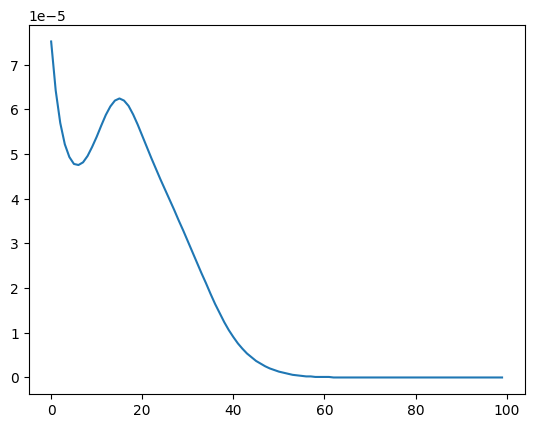

In [22]:
import matplotlib.pyplot as plt

plt.plot(losses)